In [3]:
from pyvi import ViTokenizer, ViPosTagger
from tqdm import tqdm
data_N = {}
data_A = {}
data_V = {}

with open("./data/new_data.txt") as fp:
    raw_data = fp.readlines()
    for raw in tqdm(raw_data):
        raw = raw.replace("\n", "")
        label = raw.split(" ")[0]
        text = raw.split(" ")[1:]
        x = ViPosTagger.postagging(" ".join(text))
        if label not in data_N:
            data_N[label] = [x[0][i] for i in range(len(x[0])) if "N" in x[1][i] or "P" in x[1][i]] 
        else:
            data_N[label] += [x[0][i] for i in range(len(x[0])) if "N" in x[1][i] or "P" in x[1][i]] 

        if label not in data_A:
            data_A[label] = [x[0][i] for i in range(len(x[0])) if "A" in x[1][i]] 
        else:
            data_A[label] += [x[0][i] for i in range(len(x[0])) if "A" in x[1][i]]

        if label not in data_V:
            data_V[label] = [x[0][i] for i in range(len(x[0])) if "V" in x[1][i] or "R" in x[1][i]] 
        else:
            data_V[label] += [x[0][i] for i in range(len(x[0])) if "V" in x[1][i] or "R" in x[1][i]]

        # break

100%|██████████| 46678/46678 [10:12<00:00, 76.23it/s]


In [53]:
data_noun.keys()

dict_keys(['__label__thể_thao', '__label__âm_nhạc', '__label__nhịp_sống', '__label__công_nghệ', '__label__thời_sự', '__label__thế_giới', '__label__thời_trang', '__label__du_lịch', '__label__sống_trẻ', '__label__giáo_dục', '__label__kinh_doanh', '__label__pháp_luật', '__label__giải_trí', '__label__phim_ảnh', '__label__xe_360', '__label__ẩm_thực', '__label__xuất_bản', '__label__sức_khỏe'])

In [2]:
# Luu du lieu
with open("./data/data_noun.txt", "w") as fd:
    for key, value in data_N.items():
        fd.write(key + " " + " ".join(value) + "\n")

with open("./data/data_verb.txt", "w") as fd:
    for key, value in data_V.items():
        fd.write(key + " " + " ".join(value) + "\n")

with open("./data/data_adj.txt", "w") as fd:
    for key, value in data_A.items():
        fd.write(key + " " + " ".join(value) + "\n")


In [1]:
# Load du lieu
data_noun = {}
with open("./data/data_noun.txt", "r") as fd:
    data = fd.readlines()
    for raw in data:
        raw = raw.replace("\n", "")
        raw = raw.split(" ")
        label = raw[0]
        text = raw[1:]
        data_noun[label] = text


# Load du lieu
data_verb = {}
with open("./data/data_verb.txt", "r") as fd:
    data = fd.readlines()
    for raw in data:
        raw = raw.replace("\n", "")
        raw = raw.split(" ")
        label = raw[0]
        text = raw[1:]
        data_verb[label] = text 

# Load du lieu
data_adj = {}
with open("./data/data_adj.txt", "r") as fd:
    data = fd.readlines()
    for raw in data:
        raw = raw.replace("\n", "")
        raw = raw.split(" ")
        label = raw[0]
        text = raw[1:]
        data_adj[label] = text 

In [34]:
# Danh tu
def intersection_list(list_a, list_b):
    return len(set(list_a) & set(list_b) ) / len(set(list_a))


In [36]:
intersection_list(data_noun["__label__pháp_luật"], data_noun["__label__ẩm_thực"])

0.2929304578479991

In [37]:
from tqdm import tqdm
def get_matrix_precent_same_word(data):
    matrix = [[0 for _ in range(18)] for _ in range(18)]
    label = list(data.keys())
    for i in tqdm(range(0, len(label))):
        for j in range(i, len(label)):
            if i != j:
                temp = intersection_list(data[label[i]], data[label[j]])
                matrix[i][j] = temp
                matrix[j][i] = temp
            else:
                matrix[i][i] = 0
    return matrix

In [38]:
matrix_noun = get_matrix_precent_same_word(data_noun)

100%|██████████| 18/18 [00:14<00:00,  1.26it/s]


In [39]:
matrix_verb = get_matrix_precent_same_word(data_verb)

100%|██████████| 18/18 [00:07<00:00,  2.27it/s]


In [40]:
matrix_adj = get_matrix_precent_same_word(data_adj)

100%|██████████| 18/18 [00:01<00:00,  9.03it/s]


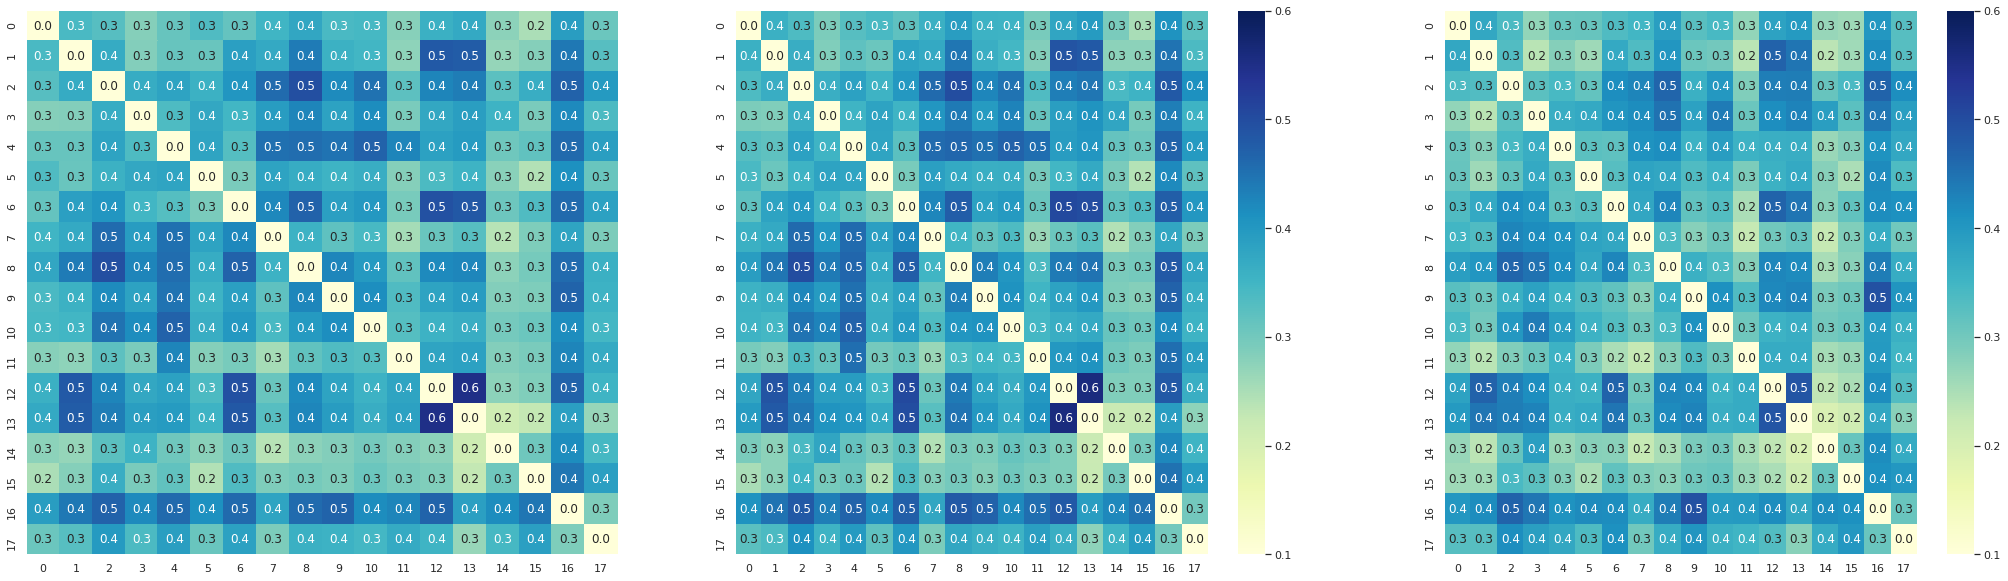

In [51]:
import seaborn as sas; sas.set_theme()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(36, 10))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sas.heatmap(matrix_noun, annot=True, fmt=".1f", vmin=0.1, vmax = 0.6, cmap="YlGnBu", cbar= False, ax=ax1)

sas.heatmap(matrix_verb, annot=True, fmt=".1f", vmin=0.1, vmax = 0.6, cmap="YlGnBu", ax=ax2)

sas.heatmap(matrix_adj, annot=True, fmt=".1f", vmin=0.1, vmax = 0.6, cmap="YlGnBu", ax=ax3)

plt.savefig("./img/so_sanh.png")
plt.show()

In [43]:
import numpy as np
print("NOUN", np.mean(matrix_noun))
print("VERB", np.mean(matrix_verb))
print("ADJ", np.mean(matrix_adj))


NOUN 0.34181498885360945
VERB 0.34899948701631134
ADJ 0.33048549582618697


In [ ]:
with open("./data/final_data.txt", "w") as fd:
    for key in data_noun.keys():
        